<a href="https://colab.research.google.com/github/batlab-art/Introductions/blob/master/Scraping_and_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Dependencies

In [ ]:
!pip install icrawler

# BingImageCrawler:

**Type** – “photo”, “clipart”, “linedrawing”, “transparent”, “animated"
**Color** – “color”, “blackandwhite”, “red”, “orange”, “yellow”, “green”, “teal”, “blue”, “purple”, “pink”, “white”, “gray”, “black”, “brown
**Size** – “large”, “medium”, “small” or larger than a given size (e.g. “>640x480”).
**License** – “creativecommons”, “publicdomain”, “noncommercial”, “commercial”, “noncommercial,modify”, “commercial,modify”.
**Layout** – “square”, “wide”, “tall”.
**People** – “face”, “portrait”.
**Date** – “pastday”, “pastweek”, “pastmonth”, “pastyear”.

https://icrawler.readthedocs.io/en/latest/builtin.html

In [ ]:
!rm /content/download/*
from icrawler.builtin import BingImageCrawler

keywordText = 'yellow round thing'  #@param {type: "string"}
num_images =   32#@param {type: "number"}
output_directory = '/content/download/'  #@param {type: "string"}


bing_crawler = BingImageCrawler(storage={'root_dir': 'download'})
bing_crawler.crawl(keyword=keywordText, max_num=num_images)

2020-09-30 11:50:18,845 - INFO - icrawler.crawler - start crawling...
2020-09-30 11:50:18,847 - INFO - icrawler.crawler - starting 1 feeder threads...
2020-09-30 11:50:18,851 - INFO - feeder - thread feeder-001 exit
2020-09-30 11:50:18,852 - INFO - icrawler.crawler - starting 1 parser threads...
2020-09-30 11:50:18,857 - INFO - icrawler.crawler - starting 1 downloader threads...
2020-09-30 11:50:19,193 - INFO - parser - parsing result page https://www.bing.com/images/async?q=yellow round thing&first=0
2020-09-30 11:50:19,406 - INFO - downloader - image #1	https://professionaldevelopment.school.nz/wp-content/uploads/2015/05/item-60.jpg
2020-09-30 11:50:19,504 - INFO - downloader - image #2	https://images.homedepot-static.com/productImages/3d85b876-ab51-4627-b4ec-293c9ebea122/svn/sunshine-yellow-home-decorators-collection-area-rugs-3311493530-64_1000.jpg
2020-09-30 11:50:19,677 - INFO - downloader - image #3	https://c1.staticflickr.com/7/6159/6170656527_9ef42dc0b4_b.jpg
2020-09-30 11:50:

In [50]:
from __future__ import print_function
import cv2
import os, random
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn

def loadAndBlendImage (alpha,file1, file2):
  # [load]
    src1 = cv2.imread(file1)
    src2 = cv2.imread(file2)
  # [load]
    if src1 is None:
      print("Error loading src1")
      return src1
    elif src2 is None:
      print("Error loading src2")
      return src2
  # [blend_images]
    beta = (1.0 - alpha)
    row1,cols1, ch1 = src1.shape

    src2Resized = cv2.resize(src2 , (cols1,row1))
    dst = cv2.addWeighted(src1, alpha, src2Resized, beta, 0.0)
    dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
    return dst
    

(-0.5, 445.5, 236.5, -0.5)

(-0.5, 799.5, 799.5, -0.5)

(-0.5, 619.5, 463.5, -0.5)

(-0.5, 619.5, 463.5, -0.5)

(-0.5, 1199.5, 1199.5, -0.5)

(-0.5, 2447.5, 3263.5, -0.5)

(-0.5, 749.5, 749.5, -0.5)

(-0.5, 445.5, 236.5, -0.5)

(-0.5, 299.5, 299.5, -0.5)

(-0.5, 1299.5, 1299.5, -0.5)

(-0.5, 1105.5, 1105.5, -0.5)

(-0.5, 999.5, 999.5, -0.5)

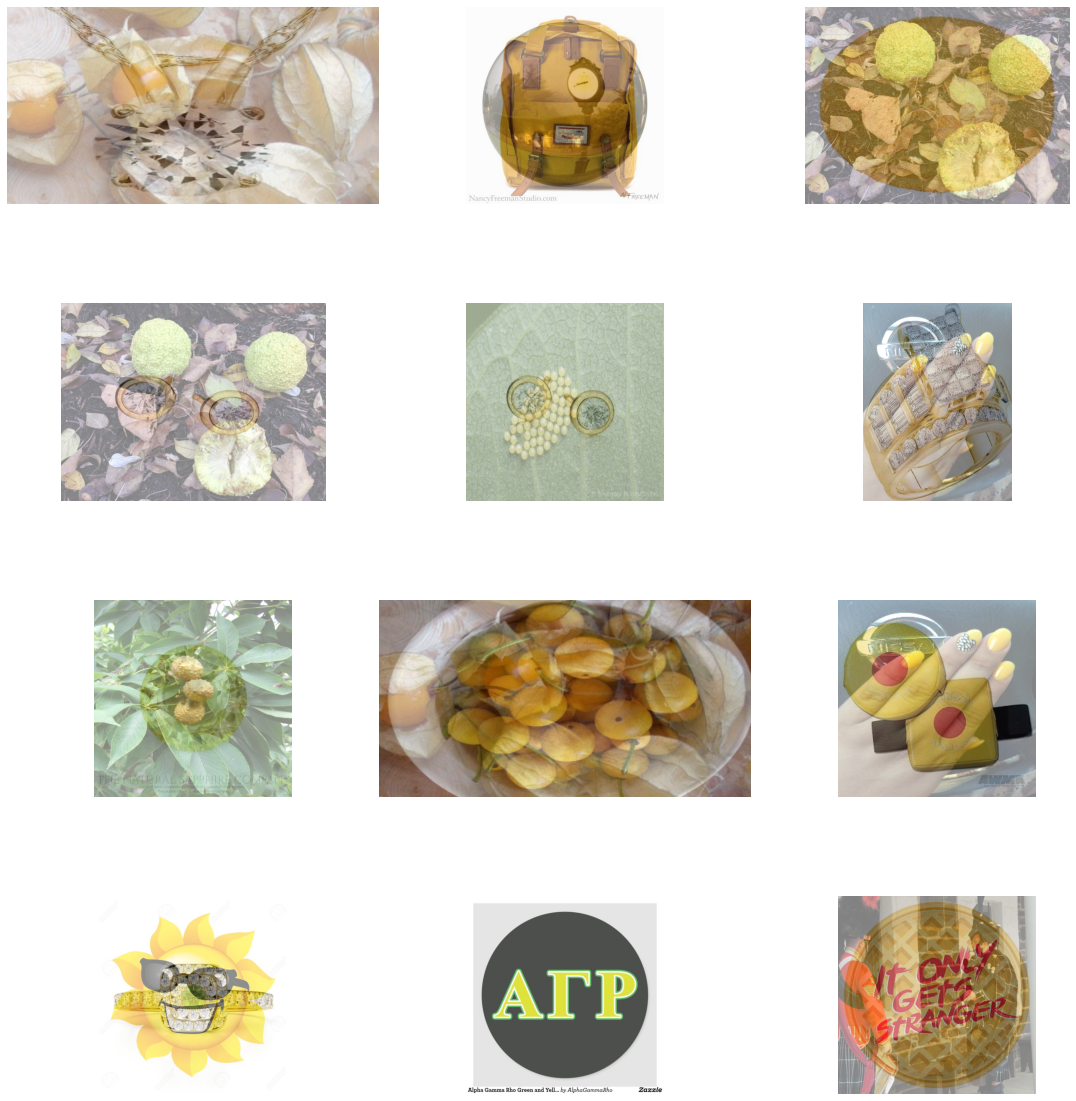

In [51]:
alpha = 0.5
inputFiles = os.listdir(output_directory)
blendList = []

# Loop Blend
for x in range(12):
  file1 = output_directory + random.choice(inputFiles)
  file2 = output_directory + random.choice(inputFiles)
  blendResult = loadAndBlendImage(alpha,file1,file2)
  if blendResult is not None :
    blendList.append(blendResult)

# Display
fig, axs = plt.subplots(4,3, figsize=(20, 20))
fig.subplots_adjust(hspace = .5, wspace=.001)
axarr = axs.ravel()

for i in range(len(blendList)):
    axarr[i].imshow(blendList[i])
    axarr[i].axis('off')

(-0.5, 749.5, 749.5, -0.5)

(-0.5, 599.5, 599.5, -0.5)

(-0.5, 1079.5, 1439.5, -0.5)

(-0.5, 4607.5, 3455.5, -0.5)

(-0.5, 999.5, 999.5, -0.5)

(-0.5, 899.5, 719.5, -0.5)

(-0.5, 999.5, 999.5, -0.5)

(-0.5, 699.5, 468.5, -0.5)

(-0.5, 399.5, 399.5, -0.5)

(-0.5, 299.5, 299.5, -0.5)

(-0.5, 999.5, 999.5, -0.5)

(-0.5, 799.5, 799.5, -0.5)

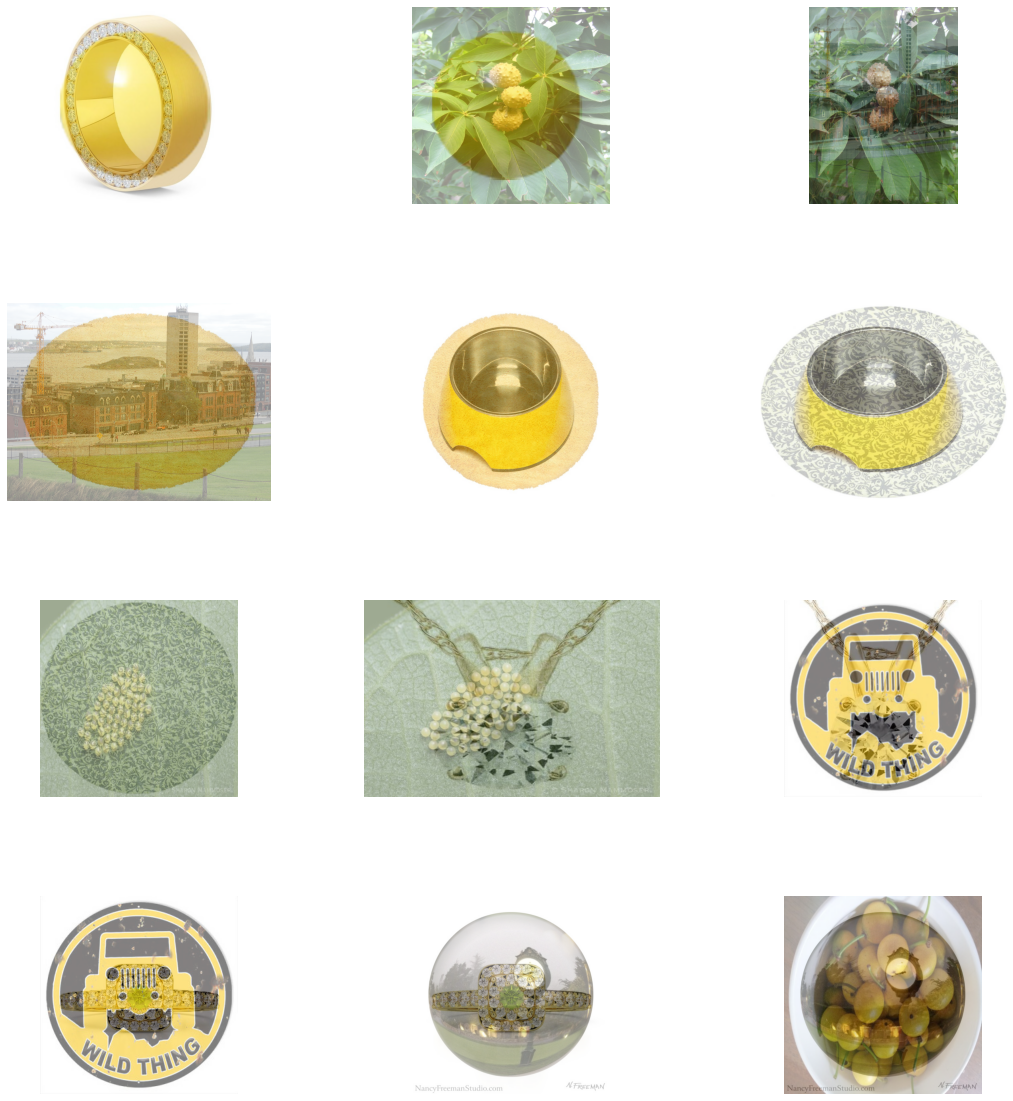

In [52]:
alpha = 0.5
blendList = []
fileList = os.listdir(imageFolder)

# Blend Images by order in folder
for x in range(12):
  file1 = output_directory + fileList[x]
  file2 = output_directory + fileList[x+1]
  blendResult = loadAndBlendImage(alpha,file1,file2)
  if blendResult is not None :
    blendList.append(blendResult)

# Display
fig, axs = plt.subplots(4,3, figsize=(20, 20))
fig.subplots_adjust(hspace = .5, wspace=.001)

axarr = axs.ravel()

for i in range(len(blendList)):
    axarr[i].imshow(blendList[i])
    axarr[i].axis('off')
    

(-0.5, 749.5, 749.5, -0.5)

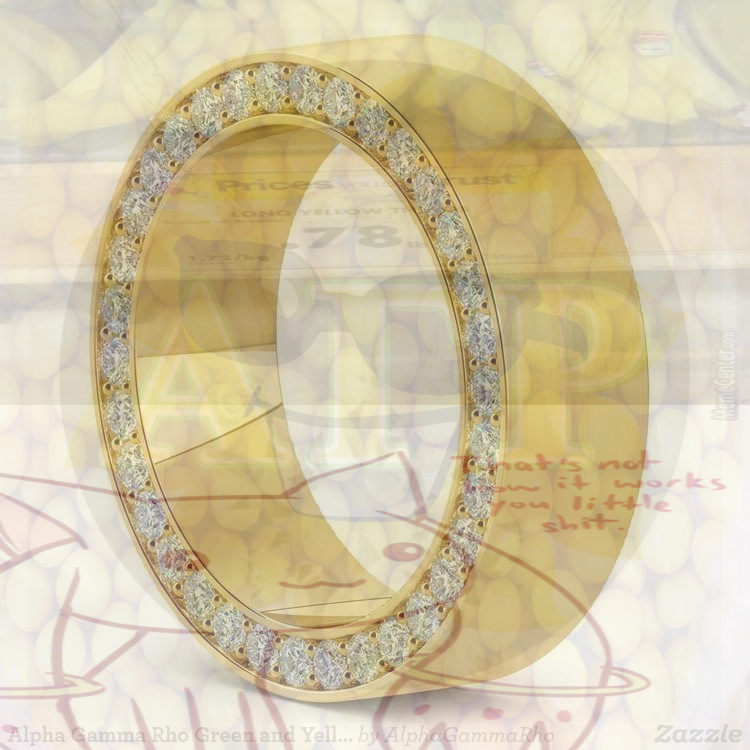

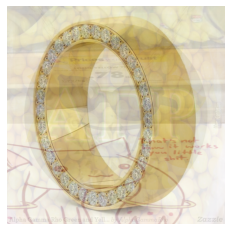

In [53]:
def blendImages (alpha,file1, file2):
  # [blend_images]
    beta = (1.0 - alpha)
    row1,cols1, ch1 = file1.shape
    src2Resized = cv2.resize(file2 , (cols1,row1))
    src2Resized = cv2.cvtColor(src2Resized, cv2.COLOR_BGR2RGB)
    dst = cv2.addWeighted(file1, alpha, src2Resized, beta, 0.0)
    return dst

alpha = 0.9
imageFolder = output_directory
blendList = []
fileList = os.listdir(imageFolder)

# Set Root Image
blendResult = cv2.imread(imageFolder + fileList[0])
blendResult = cv2.cvtColor(blendResult, cv2.COLOR_BGR2RGB)

# Blend Images
for x in range(1,8):
  file1 = imageFolder + fileList[x]
  file1 = imageFolder + random.choice(os.listdir(imageFolder))
  src = cv2.imread(file1)
  blendResult = blendImages(alpha,blendResult,src)

# Display Result
plt.imshow(blendResult)
plt.axis('off')

# imshow Patch
from google.colab.patches import cv2_imshow
cv2_imshow(cv2.cvtColor(blendResult, cv2.COLOR_RGB2BGR))

In [ ]:
from __future__ import print_function
import cv2
import os, random
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
import imageio

def loadBlendAndResize (alpha,file1, file2):
    return cv2.resize(loadAndBlendImage(alpha,file1,file2) , (800,400))

blendList = []
fileList = os.listdir(output_directory)
font = cv2.FONT_HERSHEY_SIMPLEX

# Loop Files
for x in range(10):
  file1 = imageFolder + fileList[x]
  file2 = imageFolder + fileList[x+1]
  # Loop Alpha
  for alpha in range(2,7):
    blendResult = loadBlendAndResize (alpha / 10,file1,file2)
    if blendResult is not None :
      blendResult = cv2.putText(blendResult, fileList[x], (10,370), font, 3, (255, 255, 0), 2, cv2.LINE_AA)
      blendList.append(blendResult)

# Save Gif and Display
imageio.mimsave('scaleDown.gif', blendList)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display
from pathlib import Path

gifPath = Path("/content/scaleDown.gif")
# Display GIF in Jupyter, CoLab, IPython
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')

In [ ]:

fileList = os.listdir(output_directory)

def myDissolve(image1,image2,alpha):
  # read images
    src1 = cv2.imread(image1)
    src2 = cv2.imread(image2)
  # match size
    beta = (1.0 - alpha)
    row1,cols1, ch1 = src1.shape

    src2Resized = cv2.resize(src2 , (cols1,row1))

    image = src1

    for y in range(0, row1):
        for x in range(0, cols1):
            # threshold the pixel
            image[y, x] = src1[y,x] * alpha + src2Resized[y,x] * beta
    
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Loop Files
Blended = myDissolve(imageFolder + fileList[0],imageFolder + fileList[4],0.5)

# imshow Patch
from google.colab.patches import cv2_imshow
cv2_imshow(cv2.cvtColor(Blended, cv2.COLOR_RGB2BGR))